# Load Duration and Ramping Curves

This notebook lays out the code to generate load duration curves as well as ramping curves.

### Load Duration Curves
Load duration curves are fairly straightforward and are established conceptually. They are particularly useful when considering shed measures. 

### Ramping Duration Curves

Ramping duration curves are a *new contribution to the energy analysis field. They are useful when considering the need for shift demand response. This notebook explores several ways of examining ramping duration curves. Mainly the delta period for the curve is not established. Here delta 1 denotes the difference in energy consumption between t0 and t1. delta 3 denotes the difference between t0 and t3. The absolute value is taken because negative changes are equally important to understand. 

In [1]:
import pandas as pd
import numpy as np
import os
import datetime
from Manipulate import extract_datetime_8760
import matplotlib
import glob
import re
import matplotlib.pyplot as plt
%matplotlib notebook

Note: Google recently renamed Team drives to shared drives. This may occur elsewhere. 

In [2]:
data_dirlbl = r'G:\Shared Drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\lbnl-load-enduse-shapes\anonymized_1in2_actual_actual_2014/'

dfrg = pd.read_csv(r'G:\Shared Drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\renewable_generation_2014.csv').iloc[:,1:]


### Skip the below section

Make the three aggregated datasets (Res,Com, Ind). These steps should not be repeated but rather skip down to the next block

#### NOTE: IF YOU WISH TO RUN THIS AGAIN YOU MUST ALSO IGNORE FILES WITH "building" in the title

In [5]:
data_dirlbl = r'G:\Shared Drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\lbnl-load-enduse-shapes\anonymized_1in2_actual_actual_2014/'
instublbl = '*.csv'
path = os.path.join(data_dirlbl, instublbl)
files = glob.glob(path)
files = files[:2767]
fname = 'res'
files = [f for f in files if fname in f]
#resdf = pd.read_csv(files[0])
#for i in range(1,len(files)):
#    df1 =  pd.read_csv(files[i])
#    resdf = resdf.add(df1, fill_value=0)
#resdf['hour_ending'] = resdf['hour_ending']/len(files)


In [39]:
data_dirlbl = r'G:\Shared Drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\lbnl-load-enduse-shapes\anonymized_1in2_actual_actual_2014/'
instublbl = '*.csv'
path = os.path.join(data_dirlbl, instublbl)
files = glob.glob(path)
files = files[:2767]
fname = 'ind'
files = [f for f in files if fname in f]
#inddf = pd.read_csv(files[0])
#for i in range(1,len(files)):
#    df1 =  pd.read_csv(files[i])
#    inddf = inddf.add(df1, fill_value=0)
#inddf['hour_ending'] = inddf['hour_ending']/len(files)

In [38]:
data_dirlbl = r'G:\Shared Drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\lbnl-load-enduse-shapes\anonymized_1in2_actual_actual_2014/'
instublbl = '*.csv'
path = os.path.join(data_dirlbl, instublbl)
files = glob.glob(path)
files = files[:2767]
fname = 'com'
files = [f for f in files if fname in f]
#comdf = pd.read_csv(files[0])
#for i in range(1,len(files)):
#    df1 =  pd.read_csv(files[i])
#    comdf = comdf.add(df1, fill_value=0)
#comdf['hour_ending'] = comdf['hour_ending']/len(files)

In [40]:
#resdf.to_csv(data_dirlbl+'res_buildings.csv', index=False)
#inddf.to_csv(data_dirlbl+'ind_buildings.csv', index=False)
#comdf.to_csv(data_dirlbl+'com_buildings.csv', index=False)

### Skip to here

In [4]:
resdf = pd.read_csv(data_dirlbl + 'res_buildings.csv')
inddf = pd.read_csv(data_dirlbl + 'ind_buildings.csv')
comdf = pd.read_csv(data_dirlbl + 'com_buildings.csv')


In [6]:
#add in datetime
df = resdf
df = df.add(inddf, fill_value=0)
df = df.add(comdf, fill_value=0)
df['hour_ending'] = df['hour_ending']/3
#add in datetime
year = 2014
hourfield = 'hour_ending'
df['day_of_year'] = np.ceil(df[hourfield]/24).astype(int)
dt = datetime.datetime(year,1,1,0,0)
df['date'] = dt
for ind in df.index:
    hours=df.loc[ind, hourfield]-1
    dtdelta = datetime.timedelta(hours = hours)
    df.loc[ind,'date'] = dt+dtdelta

df['month'] = df['date'].dt.month
df['weekend'] = df['date'].dt.weekday>4


In [7]:
df.head()

cooling  hour_ending           hvac      lighting         other  \
0  259.832097          1.0  644798.607018  1.312407e+06  8.416107e+06   
1  254.326661          2.0  627199.056933  1.277306e+06  7.865877e+06   
2  279.256376          3.0  650066.743649  1.266545e+06  7.422656e+06   
3  286.923205          4.0  643522.428258  1.277626e+06  7.180993e+06   
4  302.373781          5.0  684833.250178  1.329137e+06  7.070427e+06   

       plugload       poolpump       process        pumping  refrigeration  \
0  2.450048e+06   99051.346030  1.003436e+06  689124.515118   35222.308354   
1  2.232589e+06   76193.343100  9.982466e+05  687166.785871   34325.763561   
2  2.062501e+06   96003.612306  9.919937e+05  684947.534108   33961.630562   
3  1.959567e+06  109718.414064  9.959263e+05  695886.236682   32260.983081   
4  1.930603e+06  108194.547202  9.944064e+05  707110.988394   29195.734145   

          total  day_of_year                date  month  weekend  
0  1.872164e+07            1 2014-01-01 00:00:00      1    False  
1  1.775205e+07            1 2014-01-01 01:00:00      1    False  
2  1.709974e+07            1 2014-01-01 02:00:00      1    False  
3  1.675100e+07            1 2014-01-01 03:00:00      1    False  
4  1.672990e+07            1 2014-01-01 04:00:00      1    False

In [8]:
df['solar'] = dfrg['solar']
df['wind'] = dfrg['wind']

In [9]:
dfdur = df[['wind','solar','total', 'hour_ending']].copy()


Calculate net load call it sysload

In [10]:
dfdur['sysload'] = dfdur['total'] - dfdur['wind']-dfdur['solar']

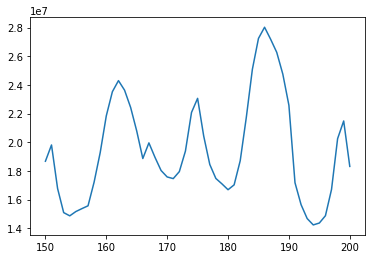

In [11]:
dfdur.loc[150:200,'sysload'].plot()

In [12]:
#Take the difference to get the shape of the ramping curve
dfdur['delta_1'] = dfdur['sysload'].diff(periods=1)
dfdur['delta_2'] = dfdur['sysload'].diff(periods=2)
dfdur['delta_3'] = dfdur['sysload'].diff(periods=3)


Text(0,0.5,'KW of load')

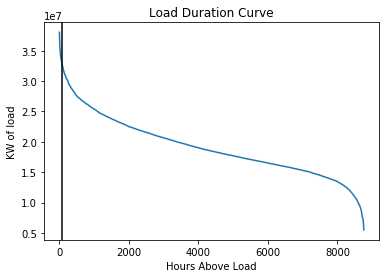

In [13]:
#Sort the values and plot them to generate a load duration curve
dfdur['sysload'].sort_values(ascending=False).reset_index().sysload.plot()
plt.axvline(x = 75, color = 'black')

plt.title('Load Duration Curve')
plt.xlabel('Hours Above Load')
plt.ylabel('KW of load')

Text(0,0.5,'Change in KW from Previous load')

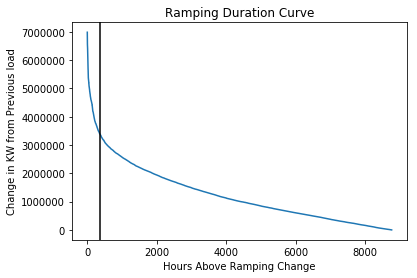

In [14]:
#take the absolute value of the differences. sort them, and plot to get the ramping duration curve
#draw a line at 365 to show the 365 ramps that happen each year (more like 180 during the summer *2)
dfdur['delta_1'].abs().sort_values(ascending=False).reset_index().delta_1.plot()
plt.axvline(x = 365, color = 'black')
plt.title('Ramping Duration Curve')
plt.xlabel('Hours Above Ramping Change')
plt.ylabel('Change in KW from Previous load')


Text(0,0.5,'Change in KW from Previous load')

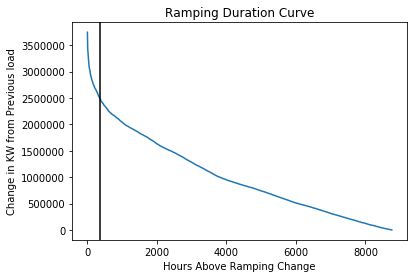

In [15]:
df['gross_delta'] = dfdur['total'].diff(periods=1)
df['gross_delta'].abs().sort_values(ascending=False).reset_index().gross_delta.plot()
plt.axvline(x = 365, color = 'black')
plt.title('Ramping Duration Curve')
plt.xlabel('Hours Above Ramping Change')
plt.ylabel('Change in KW from Previous load')

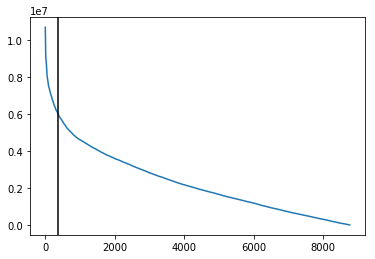

In [16]:
dfdur['delta_2'].abs().sort_values(ascending=False).reset_index().delta_2.plot()
plt.axvline(x = 365,color = 'black')

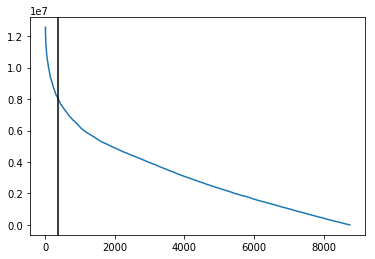

In [17]:
dfdur['delta_3'].abs().sort_values(ascending=False).reset_index().delta_3.plot()
plt.axvline(x=365,color = 'black')

In [18]:
#To apply savings shapes we need to do it in the aggregation process. 
#Let's create three data sets one res, one com, one ind to apply measures to. 

In [19]:
list(df)

['cooling',
 'hour_ending',
 'hvac',
 'lighting',
 'other',
 'plugload',
 'poolpump',
 'process',
 'pumping',
 'refrigeration',
 'total',
 'day_of_year',
 'date',
 'month',
 'weekend',
 'solar',
 'wind',
 'gross_delta']

In [20]:
df.head()

cooling  hour_ending           hvac      lighting         other  \
0  259.832097          1.0  644798.607018  1.312407e+06  8.416107e+06   
1  254.326661          2.0  627199.056933  1.277306e+06  7.865877e+06   
2  279.256376          3.0  650066.743649  1.266545e+06  7.422656e+06   
3  286.923205          4.0  643522.428258  1.277626e+06  7.180993e+06   
4  302.373781          5.0  684833.250178  1.329137e+06  7.070427e+06   

       plugload       poolpump       process        pumping  refrigeration  \
0  2.450048e+06   99051.346030  1.003436e+06  689124.515118   35222.308354   
1  2.232589e+06   76193.343100  9.982466e+05  687166.785871   34325.763561   
2  2.062501e+06   96003.612306  9.919937e+05  684947.534108   33961.630562   
3  1.959567e+06  109718.414064  9.959263e+05  695886.236682   32260.983081   
4  1.930603e+06  108194.547202  9.944064e+05  707110.988394   29195.734145   

          total  day_of_year                date  month  weekend        solar  \
0  1.872164e+07            1 2014-01-01 00:00:00      1    False -42471.00780   
1  1.775205e+07            1 2014-01-01 01:00:00      1    False -44196.24540   
2  1.709974e+07            1 2014-01-01 02:00:00      1    False -40445.00634   
3  1.675100e+07            1 2014-01-01 03:00:00      1    False -43352.55042   
4  1.672990e+07            1 2014-01-01 04:00:00      1    False -46646.73600   

           wind    gross_delta  
0  1.676178e+06            NaN  
1  1.416098e+06 -969592.114878  
2  1.272211e+06 -652310.001001  
3  1.215043e+06 -348739.853410  
4  1.237878e+06  -21105.319235

In [21]:
df['unaccounted_load'] = df['total'] -df.iloc[:,0:9].sum(axis=1) + df['hour_ending']

In [22]:
df['sys_load'] = df['total'] - df['solar'] - df['wind']

In [23]:
#Apply a 20% decrease in lighting power due to some set of measures
efflight = df['lighting']* .8 + df[['cooling','hvac', 'other', 'plugload', 'poolpump', 'process', 'pumping','refrigeration']].sum(axis=1) + df['unaccounted_load']
#turn it into GW
efflight = efflight/1000000

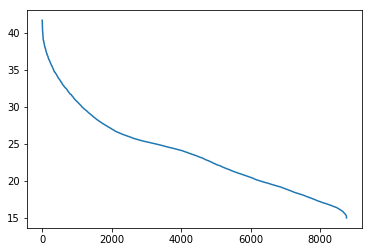

In [24]:
efflight.sort_values(ascending=False).reset_index()[0].plot()

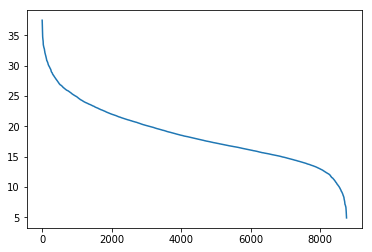

In [61]:
efflightnet = efflight - (df['wind'] + df['solar'])/1000000
efflightnet.sort_values(ascending=False).reset_index()[0].plot()

In [62]:
dflight = pd.DataFrame({'efflight':efflight, 'lightnet' : efflightnet})

In [63]:
dflight['delta_1'] = dflight['lightnet'].diff(periods=1)
dflight['delta_2'] = dflight['lightnet'].diff(periods=2)
dflight['delta_3'] = dflight['lightnet'].diff(periods=3)

Text(0,0.5,'Change in KW from Previous load')

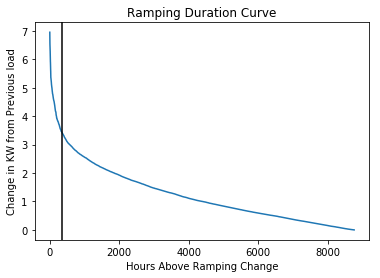

In [64]:
dflight['delta_1'].abs().sort_values(ascending=False).reset_index().delta_1.plot()
plt.axvline(x = 365, color = 'black')
plt.title('Ramping Duration Curve')
plt.xlabel('Hours Above Ramping Change')
plt.ylabel('Change in KW from Previous load')


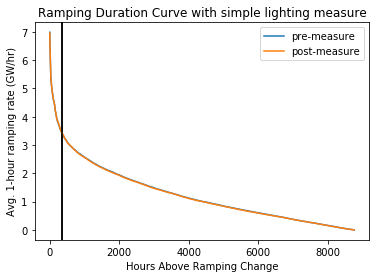

In [65]:
fig, axs = plt.subplots(1, 1)#, sharey=True)
axs.plot(dfdur['delta_1'].abs().sort_values(ascending=False).reset_index().delta_1/1000000, label='pre-measure')
axs.axvline(x = 365, color = 'black')
axs.plot(dflight['delta_1'].abs().sort_values(ascending=False).reset_index().delta_1, label='post-measure')
axs.axvline(x = 365, color = 'black')
axs.set_title('Ramping Duration Curve with simple lighting measure')
#axs[1].set_title('Post Lighting Measure')
axs.set_xlabel('Hours Above Ramping Change')
axs.set_ylabel('Avg. 1-hour ramping rate (GW/hr)')
axs.legend()


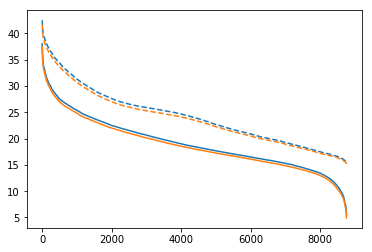

In [70]:
ax=dfdur['sysload'].div(1e6).sort_values(ascending=False).reset_index()['sysload'].plot()
ax=dflight['lightnet'].sort_values(ascending=False).reset_index()['lightnet'].plot(ax=ax)
ax=dfdur['total'].div(1e6).sort_values(ascending=False).reset_index()['total'].plot(ax=ax, linestyle='--', color='C0')
ax=dflight['efflight'].sort_values(ascending=False).reset_index()['efflight'].plot(ax=ax, linestyle='--', color='C1')



In [60]:
dfdur.max()

wind           6.139779e+06
solar          9.606000e+06
total          4.252055e+07
hour_ending    8.760000e+03
sysload        3.804637e+07
delta_1        6.608811e+06
delta_2        1.068605e+07
delta_3        1.224351e+07
dtype: float64

In [59]:
dflight.max()

efflight    41.690181
lightnet    50.976590
delta_1      8.882609
delta_2     12.854066
delta_3     16.715587
dtype: float64

In [30]:
#Apply a 20% decrease in hvac power due to some set of measures
effhvac = df['hvac']* .8 + df['cooling']*.8 + df[['lighting', 'other', 'plugload', 'poolpump', 'process', 'pumping','refrigeration']].sum(axis=1) + df['unaccounted_load']
#turn it into GW
effhvac = effhvac/1000000
effhvacnet = effhvac - (df['wind'] - df['solar'])/1000000
dfhvac = pd.DataFrame({'effhvac':effhvac, 'hvacnet' : effhvacnet})
dfhvac['delta_1'] = dfhvac['hvacnet'].diff(periods=1)
dfhvac['delta_2'] = dfhvac['hvacnet'].diff(periods=2)
dfhvac['delta_3'] = dfhvac['hvacnet'].diff(periods=3)

Text(0,0.5,'Change in KW from Previous load')

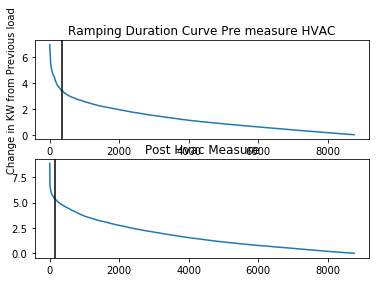

In [31]:
fig, axs = plt.subplots(2, 1)
axs[ 0].plot(dfdur['delta_1'].abs().sort_values(ascending=False).reset_index().delta_1/1000000)
axs[ 0].axvline(x = 365, color = 'black')
axs[ 1].plot(dfhvac['delta_1'].abs().sort_values(ascending=False).reset_index().delta_1)
axs[ 1].axvline(x =150, color = 'black')
axs[ 0].set_title('Ramping Duration Curve Pre measure HVAC')
axs[1].set_title('Post Hvac Measure')
axs[ 0].set_xlabel('Hours Above Ramping Change')
axs[ 0].set_ylabel('Change in KW from Previous load')

In [32]:
dfsave[150*24:164*24].plot()

NameError: name 'dfsave' is not defined

Text(0,0.5,'Change in KW from Previous load')

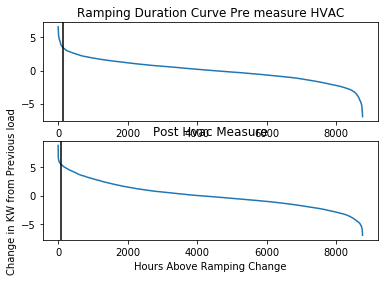

In [33]:
fig, axs = plt.subplots(2, 1)
axs[ 0].plot(dfdur['delta_1'].sort_values(ascending=False).reset_index().delta_1/1000000)
axs[ 0].axvline(x = 150, color = 'black')
axs[ 1].plot(dfhvac['delta_1'].sort_values(ascending=False).reset_index().delta_1)
axs[ 1].axvline(x =75, color = 'black')
axs[ 0].set_title('Ramping Duration Curve Pre measure HVAC')
axs[1].set_title('Post Hvac Measure')
axs[ 1].set_xlabel('Hours Above Ramping Change')
plt.ylabel('Change in KW from Previous load')

This file will need to be relocated if one wishes to explore the mascontrol results. This csv can be found in the mascontrol reposiory

In [224]:
dfsave = pd.read_csv('C:\\Users\\jglasskatz\\MASControl3\\saving_shape_MsrNResSplitAC-45to55-S17.csv').drop('Unnamed: 0', axis=1)

In [265]:
#Apply a 20% decrease in hvac power due to some set of measures
effhvac = df['hvac']* dfsave.value  + df[['cooling','lighting', 'other', 'plugload', 'poolpump', 'process', 'pumping','refrigeration']].sum(axis=1) + df['unaccounted_load']
#turn it into GW
effhvac = effhvac/1000000
sysl = (df[['hvac','cooling','lighting', 'other', 'plugload', 'poolpump', 'process', 'pumping','refrigeration']].sum(axis=1) + df['unaccounted_load']- (df['wind'] + df['solar']))/1000000
effhvacnet = effhvac - (df['wind'] + df['solar'])/1000000
dfhvac = pd.DataFrame({'effhvac':effhvac, 'hvacnet' : effhvacnet, 'sysload':sysl})
dfhvac['delta_1'] = dfhvac['hvacnet'].diff(periods=1)
dfhvac['delta_2'] = dfhvac['hvacnet'].diff(periods=2)
dfhvac['delta_3'] = dfhvac['hvacnet'].diff(periods=3)

Text(0.5, 1.0, 'Ramping Duration Curve Pre measure HVAC')

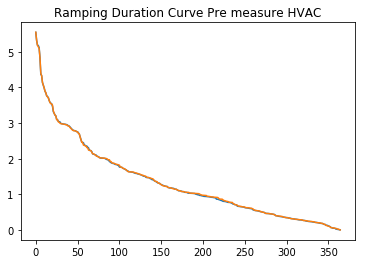

In [273]:
fig, axs = plt.subplots(1, 1)
axs.plot(dfdur.loc[:365,'delta_1'].abs().sort_values(ascending=False).reset_index().delta_1/1000000)
#axs.axvline(x = 365, color = 'black')
axs.plot(dfhvac.loc[:365,'delta_1'].abs().sort_values(ascending=False).reset_index().delta_1)
#axs.axvline(x =365, color = 'black')
axs.set_title('Ramping Duration Curve Pre measure HVAC')
#axs[0].set_title('Post Hvac Measure')
#axs[ 0].set_xlabel('Hours Above Ramping Change')
#axs[ 0].set_ylabel('Change in KW from Previous load')

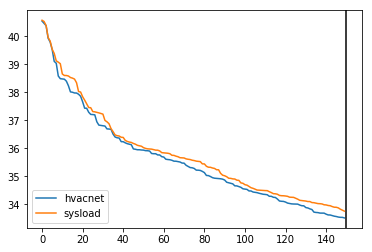

In [262]:
dfhvac['hvacnet'].sort_values(ascending=False).reset_index().hvacnet[0:150].plot()
plt.axvline(x=150, color='black')
dfhvac['sysload'].sort_values(ascending=False).reset_index().sysload[0:150].plot()
plt.legend()